In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.tail()

,image,species,individual_id
51028,fff639a7a78b3f.jpg,beluga,5ac053677ed1
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9
51031,fffbc5dd642d8c.jpg,beluga,4000b3d7c24e
51032,fffdcd42312777.jpg,bottlenose_dolphin,4ddb2eeb5efb


In [4]:
type(data.iloc[1]['individual_id'])

str

In [3]:
print(f"unique value: {len(set(data['individual_id']))}")

unique value: 15587


In [4]:
counter = {}
for value in data['individual_id'].values:
    try:
        counter[value] += 1
    except:
        counter[value] = 1

In [5]:
value_over_4 = []
for value in counter.values():
    if value >=5:
        value_over_4.append(value)
print(f'{len(value_over_4)}의 개수가 5이상인 class')

1724의 개수가 5이상인 class


In [6]:
print(f'{len([i for i in counter.values() if i == 1])}의 개수가 하나뿐인 class')
print(f'{len([i for i in counter.values() if i < 5])}의 개수가 5미만인 class')

9258의 개수가 하나뿐인 class
13863의 개수가 5미만인 class


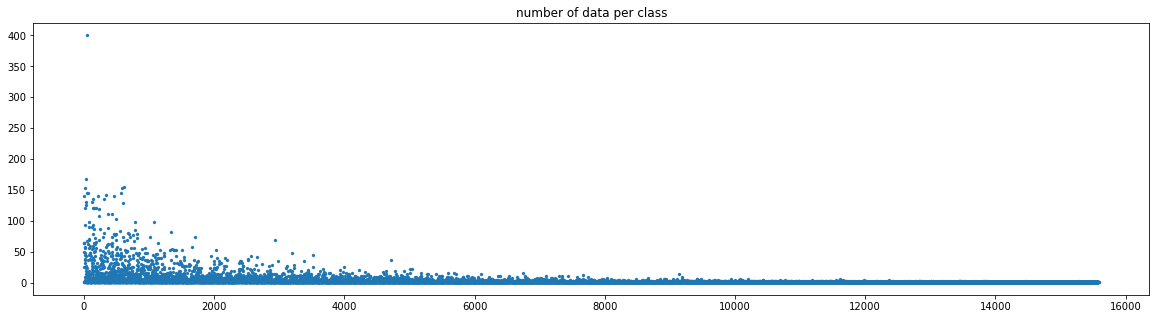

In [7]:
plt.figure(figsize=(20,5))
plt.scatter(range(15587), counter.values(),s=10,linewidths=0.1)
plt.title("number of data per class")
plt.show()

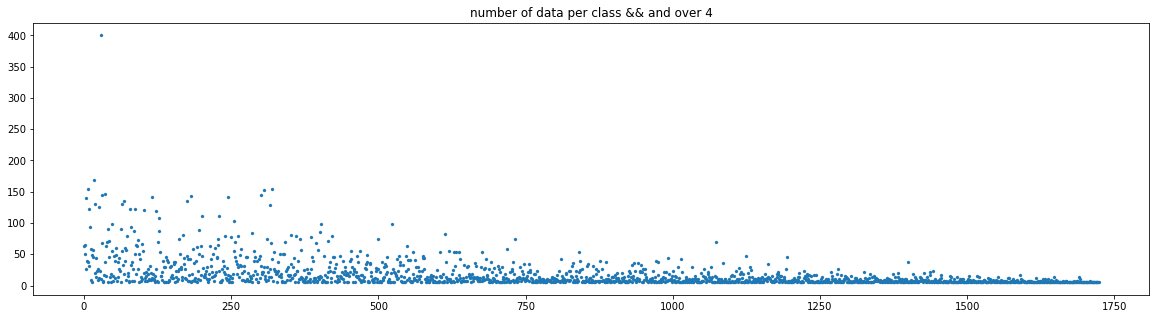

In [8]:
plt.figure(figsize=(20,5))
plt.scatter(range(1724), value_over_4,s=10,linewidths=0.1)
plt.title("number of data per class && and over 4")
plt.show()

In [10]:
import pickle
with open('image_size','rb') as f:
    image_size = pickle.load(f)    

In [16]:
for value in image_size.keys():
    if value.endswith('_41'):
        print(value)

180_41


In [17]:
image_size['75_68']

1

In [17]:
print(f'image_size: {max(image_size, key=image_size.get)}, {max(image_size.values())}')

image_size: 3599_2399, 7463


In [22]:
width = []
height = []

for size in image_size.keys():
    w, h = size.split('_')
    width.append(int(w))
    height.append(int(h))
    
print(f'max width {max(width)}')
print(f'max height {max(height)}')
print(f'min width {min(width)}')
print(f'min height {min(height)}')

max width 3600
max height 5399
min width 75
min height 41


Text(0, 0.5, 'Height')

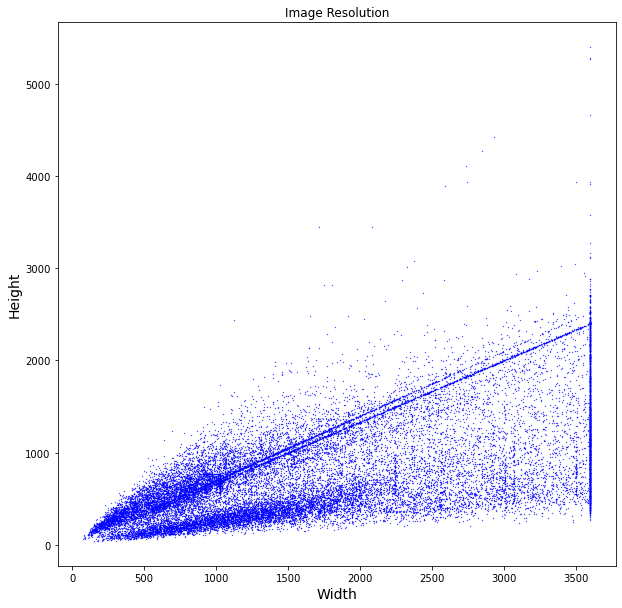

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
points = ax.scatter(width, height, color='blue', s=0.1, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)